# Lesson: Probabilistic Inference

Sometimes, we are interested not just in simulating possible outcomes of a procedure, but in deciding between multiple hypothetical procedures that could have produced an outcome that we have observed.

For instance, rather than asking "what is the probability that if I flip a coin twice, it lands on heads twice", we might ask, "I flipped a coin twice and it landed on heads twice; what is the probability that it's a fair coin (rather than a trick coin that always lands heads)?"

This is a problem of _inference_, or drawing conclusions from evidence, and problems like this crop up everywhere, from any scientific discipline to the reasoning that we do in our daily lives.

(Aside: In this lesson, we'll be taking a _Bayesian_ approach to inference, which is named after a theorem of probability discovered by Thomas Bayes in the 1700's. If you take AP Statistics in high school, you'll probably learn a different approach to these problems, called _frequentist_ statistics, based on a different interpretation of probability and inference. There are advantages and disadvantages to both, and if there you're interested, there is tons of material out there comparing the frequentist and Bayesian schools of thought that you can look up and read.)

Here are some more examples of problems you could solve with inference:
- An astronomer notices a weird pattern of radio waves that could either be a sign of a new extrasolar planet, or just random noise. Which is it?
- Google has built a computer AI to play the game of Go, and has won two games out of two against the reigning Go champion Lee Sedol. What is the probability that Lee Sedol comes back and wins the next three games?
- A poll of 1000 people says that 600 will vote for Presidential Candidate A and 400 will vote for Presidential Candidate B. What is the probability that A wins the election, and by how much?
- The _Federalist Papers_ were a series of 85 essays written by Alexander Hamilton, James Madison, and John Jay, but published anonymously under a common name. Using knowledge of the authors' different writing sytles, can we identify who wrote which?

Notice that these problems are not fully specified: as written, they don't have "correct answers". In order to get anywhere, we generally need to make additional assumptions.

## Comparing likelihoods

Let's try our coin flip example. We have two hypotheses to consider: either the coin is fair, or the coin is a trick coin that always lands heads. First let's suppose the coin is fair and find the likelihood that it would have landed heads twice. As it turns out, we already did that in the previous lesson, so we can copy that work here:

In [1]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
trials = 10000
count = 0
for i in range(trials):
    first = np.random.choice(["Heads", "Tails"])
    second = np.random.choice(["Heads", "Tails"])
    if first == "Heads" and second == "Heads":
        count = count + 1
        
print("Got both heads", count, "times out of", trials)
print("Estimated probability:", count/trials)

Got both heads 2470 times out of 10000
Estimated probability: 0.247


Now we can compare that to the likelihood of the trick coin producing heads twice. As it happens, we've said that the trick coin always lands heads, so we already know that the answer should be 100%, but we can make the computer do it anyway by modifying the code so that there's only one choice, "Heads":

In [3]:
trials = 10000
count = 0
for i in range(trials):
    first = np.random.choice(["Heads"])
    second = np.random.choice(["Heads"])
    if first == "Heads" and second == "Heads":
        count = count + 1
        
print("Got both heads", count, "times out of", trials)
print("Estimated probability:", count/trials)

Got both heads 10000 times out of 10000
Estimated probability: 1.0


Comparing these two, we see that the observations are about four times as likely under the trick coin hypothesis as under the fair coin hypothesis. So the evidence favors the trick coin hypothesis four to one.

## Incorporating prior beliefs

"But wait", you might say. "I wouldn't be at all surprised if I flipped a coin twice and got heads both times. That doesn't seem like enough evidence to conclude that the coin is biased."

You would be right. It turns out there is a missing part of the puzzle: prior beliefs. If you find a coin, and you know nothing about it, you're much more likely to believe that the coin is fair than not, because most coins are.

In order to get a proper estimate of how much you believe in a hypothesis after observing some evidence, you have to take into account both how likely the evidence is under each hypothesis, and how much you believed in each hypothesis before seeing anything.

One way of accounting for this is to treat the hypothesis itself as something random, and generate it from a distribution according to your beliefs. For instance, if you believe 19 out of 20 coins are fair, you might generate something like this:

In [4]:
def coin_is_tricky():
    if np.random.random_integers(1, 20) == 1:
        return True
    else:
        return False

if coin_is_tricky():
    print("Tricky coin")
else:
    print("Fair coin")

Fair coin


The above code will print "Fair coin" 95% of the time, and "Tricky coin" 5% of the time. We can verify this by doing repeated trials and plotting the results, as we did in the previous lesson:

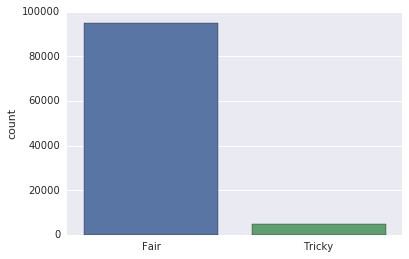

In [5]:
trials = 100000
results = []
for i in range(trials):
    if coin_is_tricky():
        results.append("Tricky")
    else:
        results.append("Fair")
 
seaborn.countplot(results)

With this in hand, we can now incorporate our evidence. We do this in several steps, for each trial:
1. generate a random hypothesis (fair or tricky coin)
2. according to which hypothesis we chose, generate observations (heads or tails)
3. if the observations match what we actually saw, record which hypothesis generated them.

We can then plot the results to get the relative probability of each hypothesis given the observations.

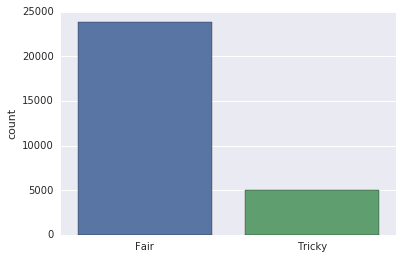

In [6]:
trials = 100000
results = []
for i in range(trials):
    if coin_is_tricky():
        hypothesis = "Tricky"
        first = np.random.choice(["Heads"])
        second = np.random.choice(["Heads"])
    else:
        hypothesis = "Fair"
        first = np.random.choice(["Heads", "Tails"])
        second = np.random.choice(["Heads", "Tails"])
    if first == "Heads" and second == "Heads":
        results.append(hypothesis)
        
seaborn.countplot(results)

As we can see, the "tricky" bar is bigger than before, but still dominated by the "fair" bar. As we'd expect! Of course, the results depend on the assumption we made earlier about how likely we believe tricky coins are to begin with, but whatever prior assumptions we use, we'll get results that incorporate both the assumptions and the observations.

(Aside: The method we're using here -- do a bunch of trials, and throw out the ones that don't match our observations -- is called _rejection sampling_. For problems where you have more observed data, it's unlikely that any of your hypotheses will randomly generate exactly what you observed, so this won't work. People have developed many more sophisticated methods for Bayesian inference, and there are entire courses and lots of research about them. But rejection sampling is simple and it works for these examples, so we'll stick with it here.)

### Exercise

I have a box that contains several different types of dice: a 4-sided die, a 6-sided die, an 8-sided die, a 12-sided die, and a 20-sided die. I reach into the box and select one at random, roll it, and get a 6.

You don't see which die I rolled (but you can assume that I really did roll a 6). What is the probability that I rolled each die?

Hint: You may want to use `random.choice([4, 6, 8, 12, 20])` to simulate the process of choosing a random die from the box.

## Optional extended example: Lee Sedol vs AlphaGo

Oftentimes, we want to infer the probability of an event by counting how often it happens out of a large number of occurrences. In fact, that's exactly what we've been doing throughout this lesson! If you observe that something happened 200 times out of 1000, that's pretty strong evidence that it has a 20% probability of happening (assuming that the thing can be well thought of as having a "probability of happening" that is the same each time, which is not always the case).

However, what if you only have a few observations? For example, let's say that in a Go match between Lee Sedol and Google's AI AlphaGo, you've observed AlphaGo win 2 times out of 2. How much evidence is there to conclude that it will happen again?

We can treat this problem within the same framework that we've used for the previous problems:
- generate hypotheses (such as "AlphaGo has a 80% chance of winning a game against Lee Sedol")
- generate data according to the hypothesis (here, which player won each game)
- record the results that are consistent with the observations we saw

For instance, suppose that our prior belief is that "AlphaGo has a N% chance of winning" is equally probable for all values of N from 0 to 100. We can express this using `random.uniform`:

In [7]:
win_chance = np.random.uniform(0, 100)
print("Hypothesis: AlphaGo has a", win_chance, "% chance of winning")

Hypothesis: AlphaGo has a 75.05926526868365 % chance of winning


Let's visualize this distribution with a plot, as usual:

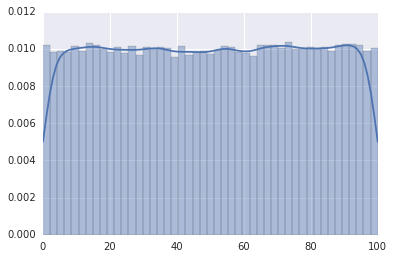

In [8]:
trials = 100000
results = []
for i in range(trials):
    win_chance = np.random.uniform(0, 100)
    results.append(win_chance)
 
seaborn.distplot(results, kde_kws={'clip': (0, 100)})

To simulate matches according to our hypothesis, we can use `random.uniform` to generate another random variable, and see whether it's less than `win_chance` (if you think about it, this has a `win_chance` percent chance of being true):

In [9]:
if np.random.uniform(0, 100) < win_chance:
    print("AlphaGo won!")
else:
    print("Lee Sedol won!")

Lee Sedol won!


Now we can see what our distribution looks like after observing that AlphaGo won a match.

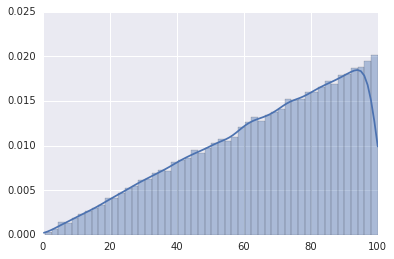

In [10]:
trials = 100000
results = []
for i in range(trials):
    win_chance = np.random.uniform(0, 100)
    if np.random.uniform(0, 100) < win_chance:
        results.append(win_chance)

seaborn.distplot(results, kde_kws={'clip': (0, 100)})

As we might expect, higher winning probabilities for AlphaGo are now more likely.

### Exercise

Part 1: Copy the code above and modify it to observe that AlphaGo won two matches, not just one.

Part 2: Given that AlphaGo won the first two matches, what is the probability that it will win the next three? What is the probability that Lee Sedol will win the next three? (Hint: you'll want to modify what you collect in the `results` list.)

Part 3: We assumed a prior belief that put an equal probability on AlphaGo having N% chance of winning, for every N from 0 to 100. Is this a realistic assumption? Would you pick a different prior belief?

Part 4: Can you adapt your code for the polling problem in the introduction? (Hint: Instead of the probability that Player A wins a game, consider the probability that a randomly polled person votes for Candidate A.)
- A poll of 1000 people says that 600 will vote for Presidential Candidate A and 400 will vote for Presidential Candidate B. What is the probability that A wins the election, and by how much?